In [1]:
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

stopwords = nltk.corpus.stopwords.words('english')
lemmetizer = nltk.WordNetLemmatizer()

def remove_stop_words(text):
    text = [w for w in text if w.lower() not in stopwords]
    return text

def lemmetize_words(word_list):
    lemmetized = [lemmetizer.lemmatize(w) for w in word_list]
    return lemmetized

def remove_special_characters(text):
    text = [w for w in text if w.isalnum()]
    return text

def remove_non_english_words(text):
    printable = set(string.printable)
    return [word for word in text 
            if all(char in printable for char in word)]

def fix_text(row):
    return ' '.join(row)

df = pd.read_csv('IMDB Dataset.csv')
df['sentiment'] = df.sentiment.astype('category')
df = df.dropna()
df['final_text'] = df['review'].apply(nltk.word_tokenize)
df['final_text'] = df['final_text'].apply(remove_special_characters)
df['final_text'] = df['final_text'].apply(remove_non_english_words)
df['final_text'] = df['final_text'].apply(remove_stop_words)
df['final_text'] = df['final_text'].apply(lemmetize_words)
df['final_text'] = df['final_text'].apply(fix_text)

train_x, test_x, train_y, test_y = model_selection.train_test_split(df['final_text'], df['sentiment'], test_size=0.2)

In [2]:
tfidvect = TfidfVectorizer(max_features=5000)
tfidvect.fit(df['final_text'])
train_x_tfidf = tfidvect.transform(train_x)
test_x_tfidf = tfidvect.transform(test_x)

In [3]:
model = svm.SVC()
model.fit(train_x_tfidf, train_y)
pred = model.predict(test_x_tfidf)
accuracy_score(pred, test_y)

0.8839

<AxesSubplot:>

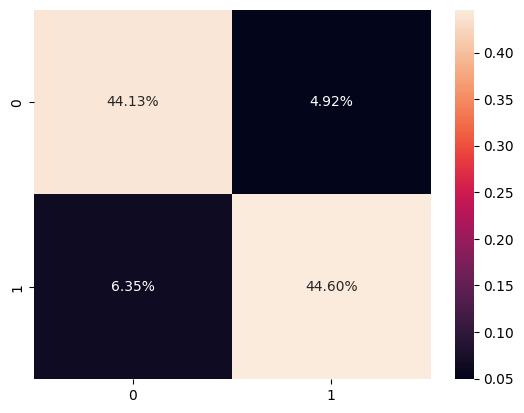

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(pred, test_y)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='0.2%')

In [12]:
import tweepy
import config
import re
from translate import translate_text

consumer_key = config.api_key
consumer_secret = config.api_secrets
access_token = config.access_token
access_token_secret = config.access_secret
bearer_token = config.bearer_token

try:
    api = tweepy.Client(bearer_token=bearer_token)
except:
    print("Error: Authentication Failed")

def clean_text(text):
     return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])(\w+:\/\/\S+)", " ", text).split())   

tweets = tweepy.Paginator(api.search_recent_tweets , "Donald Trump", max_results = 100).flatten(limit=1000)
    
def count(list):
    positive_count = 0
    negative_count = 0
    for line in list:
        if model.predict(tfidvect.transform([clean_text(line.text)])) == 'negative':
            negative_count += 1
        elif model.predict(tfidvect.transform([clean_text(line.text)])) == 'positive':
            positive_count += 1

    return positive_count, negative_count

count(tweets)


(56, 44)

In [11]:
from translate import translate_text
tweets2 = tweepy.Paginator(api.search_recent_tweets , "Norge", max_results = 100).flatten(limit=1000)
def translated_count(list):
    positive_count = 0
    negative_count = 0
    for line in list:
        if model.predict(tfidvect.transform([clean_text(translate_text('en',line.text))])) == 'negative':
            negative_count += 1
        elif model.predict(tfidvect.transform([clean_text(translate_text('en',line.text))])) == 'positive':
            positive_count += 1

    return positive_count, negative_count

translated_count(tweets2)


(78, 22)

In [39]:
import tweepy
import config
import re
from translate import translate_text

consumer_key = config.api_key
consumer_secret = config.api_secrets
access_token = config.access_token
access_token_secret = config.access_secret
bearer_token = config.bearer_token

try:
    api = tweepy.Client(bearer_token=bearer_token)
except:
    print("Error: Authentication Failed")

tweets = tweepy.Paginator(api.search_recent_tweets , "Norge", max_results = 100, tweet_fields=['lang']).flatten(limit=1000)
tweets2 = api.search_recent_tweets(query='Donald Trump -is:retweet', tweet_fields=['lang'])
for t in tweets:
    if t.lang == 'no':
        print(t.text)

@HansMagnusNils1 @Folkehelseinst @Prebens @erna_solberg @jonasgahrstore @BentHHoyre Nei nei nei, det er bare sånn at Norge har masse gamlinger som ikke døde under koronabølgen som nå dør av alderdom.
@Chilli_______p @KjemiSarah Jeg er født og oppvokst i Norge og forholder forholder meg til forholdene her. Hvis du er så bekymret for Iranske kvinner og barn så må du gjerne flytte dit og protestere mot regjeringen der.
Sønnen til Fredwall kom ut som trans i 2021. Denne tendensen med at transaktivister får transbarn er påfallende. Lignende er kjent fra utlandet, og brer også om seg i Norge. Denne damen er skyldig i transing av eget barn.
Karen-AnnaEggen her👎 I 2015 fikk vi en bølge av flyktninger, som kom over Storskog (på sykkel). Spørsmålet ble om dette var en villet handling fra Russland. Alle bevisene peker i den retning /1 https://t.co/Rfq90I4kFY
RT @audunlysbakken: Dette er gode takter fra regjeringen. Kuttplaner i sykehus, velferd og utdanning på grunn av inflasjonen kan legges til…